# CS170A -- HW#0 -- Solution form -- Matlab

Your name:  Ryan Trihernawan

Your UID:  904-063-131

<b>Please upload only this notebook to CCLE by the deadline.</b>

<b>Policy for late submission of solutions:</b>  We will use Paul Eggert's Late
Policy: $N$ days late $\Leftrightarrow$ $2^N$ points deducted}
The number of days late is $N=0$
for the first 24 hrs, $N=1$ for the next 24 hrs, etc., and if you submit
an assignment $H$ hours late, $2^{\lfloor H/24\rfloor}$ points are
deducted.

## Problem 1:  Images (30 points)

<b>(a) color-to-grayscale transformation:</b>
<br/>
include both your function <tt>grayscale(A)</tt>
and its result where <tt>A</tt> the RGB Mandrill image.

In [2]:
function [ R, G, B ] = image2rgb( A )
    R = double(A(:,:,1));
    G = double(A(:,:,2));
    B = double(A(:,:,3));
end

function [ A ] = rgb2image( R,G,B )
    A(:,:,1) = R;
    A(:,:,2) = G;
    A(:,:,3) = B;
end

function AA = grayscale(A)
    [R,G,B] = image2rgb(A);
    R1 = (R + G + B)/3;
    G1 = R1;
    B1 = R1;
    AA = rgb2image(R1,G1,B1);
end

Error: Function definitions are not permitted in this context.


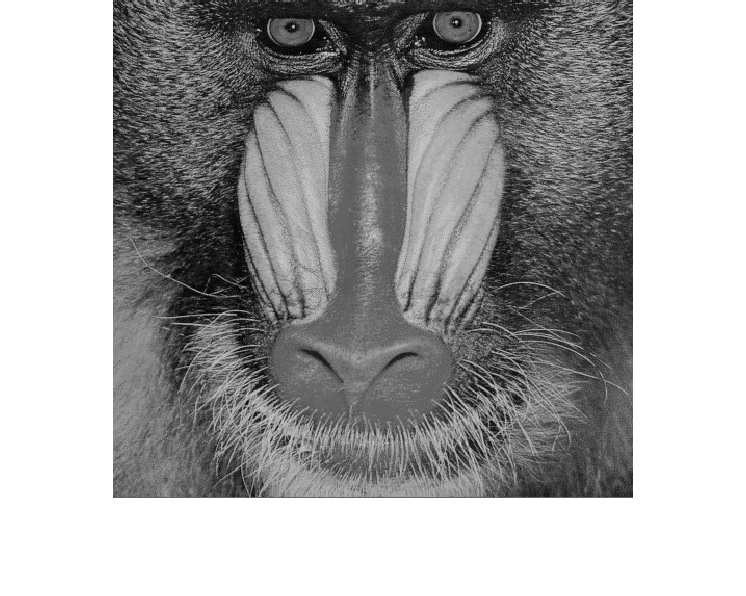

In [25]:
load mandrill
Mandrill = ind2rgb(X,map);
imshow(grayscale(Mandrill))

<b>(b) image saturation and oversaturation:</b>
<br/>
include both your function <tt>saturate(A,t)</tt>
and its result where <tt>A</tt> the RGB Mandrill image, when t=0.25.


In [4]:
function X = saturate(A,t)
GrayA = grayscale(A);
X = (t * A) + ((1 - t) * GrayA); 
end

Error: Function definitions are not permitted in this context.


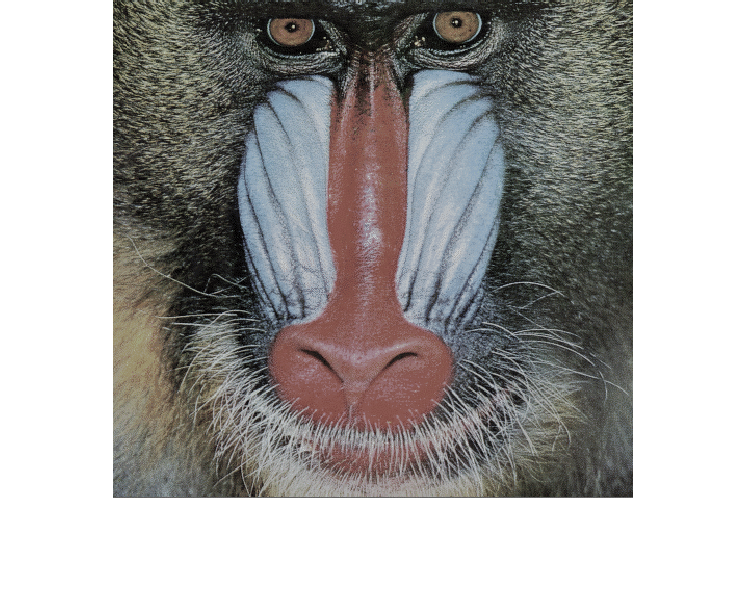

In [26]:
imshow(saturate(Mandrill, 0.25))

<b>(c) image brightening:</b>
<br/>
include both your function <tt>brighten(A,t)</tt>
and its result where <tt>A</tt> the RGB Mandrill image, when t=0.25.

In [4]:
function [AA] = brighten(A,t)
    AA = t * A;
end

Error: Function definitions are not permitted in this context.


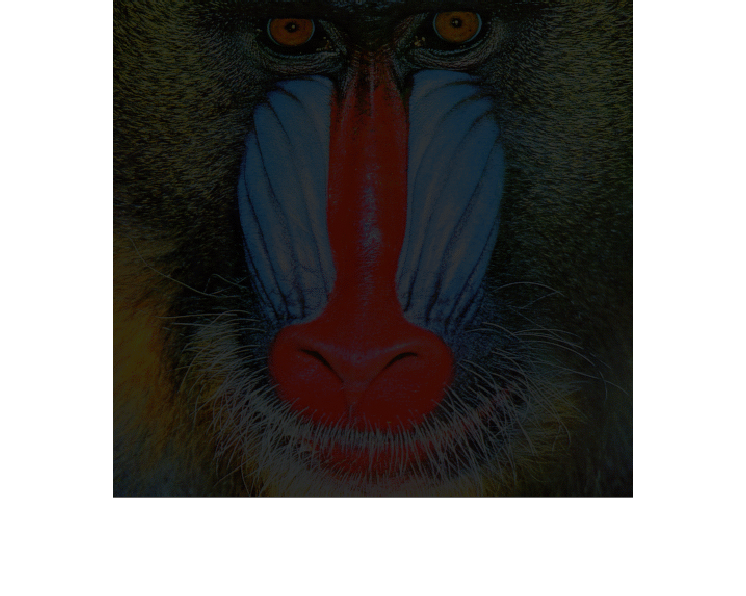

In [18]:
imshow(brighten(Mandrill, 0.25))

## Problem 2: Color Models  (30 points)

<b>(a) RGB to YCbCr(R,G,B):</b>
<br/>
Prove that the result of <tt>RGB to YCbCr(R,G,B)</tt>
are all in the range 0 t 255, provided R, G, and B are.

In [ ]:
The sum of the first row of T is 1, thus provided that R, G, and B are between 0 and 255, 
the multiplication of the first row of T and (R G B) will yield a minimum value of 0 when R, G, and B are all 0, 
and a maximum value of 255 when R, G, and B are all 255. 

The sum of the first two elements of the second row of T is -0.5, thus the multiplication of the second row of T 
and (R G B) will yield a minimum value of 0 when R is 255, G is 255, and B is 0 (provided that the value is rounded 
down), and a maximum value of 255 when R is 0, G is 0, and B is 255 (provided that the value is rounded down). 
Any other combinations of values for R, G, and B will yield a value between 0 and 255. 

The sum of the last two elements of the third row of T is -0.5. The argument is similar to the previous argument.


<b>(b) RGB to CMY(R,G,B):</b>
<br/>
Develop a similar kind of function <tt>RGB_to_CMY(R,G,B)</tt>
for converting RGB to CMY values.

In [3]:
function [C_uint8, M_uint8, Y_uint8] = RGB_to_CMY(Rval, Gval, Bval)
    MAXJSAMPLE = 255;

    R = double(Rval);
    G = double(Gval);
    B = double(Bval);
    if (max(max([R G B])) <= 1.0)
       R = R * MAXJSAMPLE;
       G = G * MAXJSAMPLE;
       B = B * MAXJSAMPLE;
    end;
    
    C = MAXJSAMPLE - R;
    M = MAXJSAMPLE - G;
    Y = MAXJSAMPLE - B;
    
    C_uint8 = uint8(C);
    M_uint8 = uint8(M);
    Y_uint8 = uint8(Y);
end

Error: Function definitions are not permitted in this context.


<b>(c) CMY Mandrill:</b>
<br/>
Show your result of <tt>RGB_to_CMY()</tt> for the Mandrill image by rendering it in RGB.
(Please display the image in RGB -- with Cyan as Red, Magenta as Green, Yellow as Blue.)

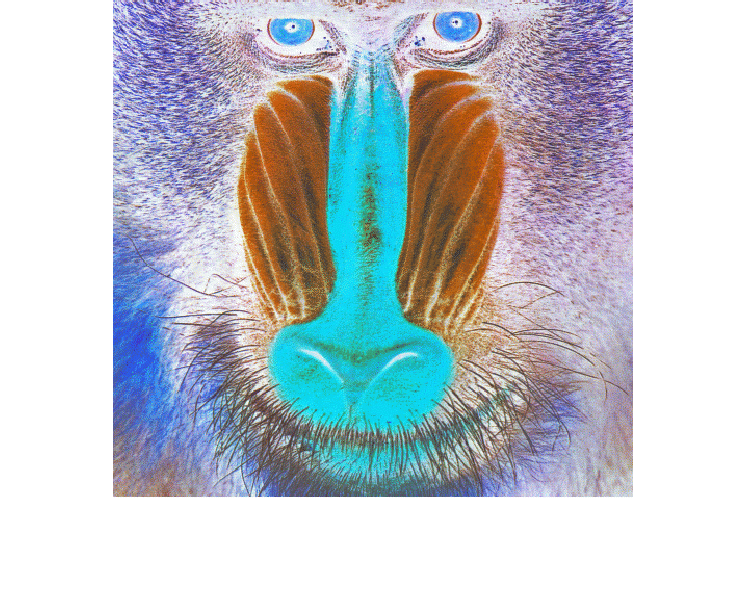

In [21]:
[R, G, B] = image2rgb(Mandrill);
[C, M, Y] = RGB_to_CMY(R, G, B);
CMY = rgb2image(C, M, Y);
imshow(CMY);

## Problem 3: Rotations  (20 points)

The file <tt>rotations_and_reflections.m</tt> produces some 2x2 matrices,
and shows how to define symbolic variables like $\theta$.
Using symbolic values, find a 3x3 matrix for $R_{123}(\psi,\theta,\phi)$.
(Hint: blkdiag might help.)

In [24]:
psi = sym('psi');
theta = sym('theta');
phi = sym('phi');

Rotation = @(t) [cos(t) -sin(t) ; sin(t) cos(t)];

simplify(blkdiag(Rotation(psi), 1) * blkdiag(1, Rotation(theta)) * blkdiag(Rotation(phi), 1))

ans =
 
[ cos(phi)*cos(psi) - cos(theta)*sin(phi)*sin(psi), - cos(psi)*sin(phi) - cos(phi)*cos(theta)*sin(psi),  sin(psi)*sin(theta)]
[ cos(phi)*sin(psi) + cos(psi)*cos(theta)*sin(phi),   cos(phi)*cos(psi)*cos(theta) - sin(phi)*sin(psi), -cos(psi)*sin(theta)]
[                              sin(phi)*sin(theta),                                cos(phi)*sin(theta),           cos(theta)]


## Problem 4: Slices  (20 points)

<b>(a) Global Average Temperature Anomaly:</b>
<br/>
plot the average (non-missing-value) temperature anomaly over the entire grid,
for every year from 1916 to 2015.

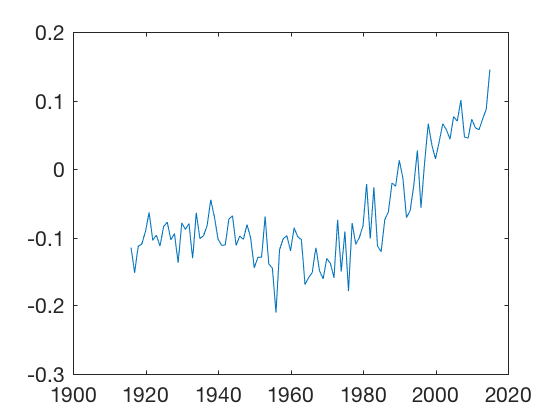

In [15]:
%   GHCN is a large matrix of global historical temperature data, from 1880 to the present
%   We downloaded it from ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/v3/grid/
%   The paper describing the dataset is at http://onlinelibrary.wiley.com/doi/10.1029/2011JD016187/pdf

%   The geographic grid  has 36 rows and 72 columns of grid boxes, each covering 5 x 5 degrees.
%   Although the earth is spherical and does not fit a 36 x 72 rectangular grid very well,
%   for simplicity we will use just a rectangular map of the world, with 36 latitude and 72 longitude points.

%   The dataset covers 2016 - 1880 + 1 = 137 years, with 12 months per year.
%   As a .csv file, the dataset is a (36 x 12 x 137) x 74 matrix of temperature values,
%   where the first two columns give the year and month.  If you look at the ghcn.csv file,
%   you will see exactly how the data looks.

%   The script below reads in the data as a 2D matrix of size (36*12*137) x 74 matrix.
%   It then resizes it into a 4D array, with dimensions  36 x 12 x 137 x 74.
%   The script also fixes the values to be in degrees centigrade.

%   -- D.S. Parker, Fall 2016.

GHCN = csvread('ghcn.csv');

%   The data was artificially shifted to [0, 4500];
%     its range should be [-2500, +2000]/100 = [-25,+20], in degrees Centigrade.
%     Since our focus here is on warming, we ignore temperatures below -5.
%   We omit the year and month in columns 1:2 before scaling:

GHCN_in_centigrade  = (GHCN(:,3:74) - 2500) / 100;

temperature_anomaly = reshape( GHCN_in_centigrade, [36, 12, 137, 72] );   % convert to a 4D matrix, so we can use slices

%   maybe useful:

missing_values = (temperature_anomaly == -25);

number_of_missing_values = sum(sum(sum(sum( missing_values ))));

number_of_all_GHCN_values = prod(size( temperature_anomaly ));

maximum_anomaly_value = max(max(max(max( temperature_anomaly ))));

minimum_anomaly_value = min(min(min(min( temperature_anomaly .*  (~ missing_values) ))));  %  '~' is 'not' in MATLAB

year_month_anomaly = @(Y,M) reshape( temperature_anomaly(:, M, Y-1880+1, :), [36 72]);

year_month_missing = @(Y,M) reshape(      missing_values(:, M, Y-1880+1, :), [36 72]);

month = { 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December' };

my_years = 1916:2015;
normalized_temperature_anomaly = temperature_anomaly;
normalized_temperature_anomaly(missing_values) = 0;
my_slice = normalized_temperature_anomaly( :, :, my_years - 1880 + 1, : );

total_number_of_grid_squares = length(temperature_anomaly(:,1,1,1)) * length(temperature_anomaly(1,1,1,:)) * 12;
N = total_number_of_grid_squares;
average_global_anomaly_by_year = reshape( sum(sum(sum( my_slice, 4),2),1), [length(my_years) 1] ) / N;
plot( my_years, average_global_anomaly_by_year )


<b>(b) Global Warming:</b>
<br/>
Based on your plot, give your opinion on this question: is `global warming' real?

In [7]:
Yes, global warming is real. The graph shows that the global temperature has increased drastically in the past 100 years. 

Error: Unexpected MATLAB operator.
